In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/data Analytics/cognify intership/Dataset .csv")
print(data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [5]:
# dataset information

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
#data description
print(data.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

# Task 1: Top Cuisine

#  Determine the top three most  common cuisines in the dataset

In [7]:
# convert a data in DataFrame

df = pd.DataFrame(data)

# count the occurrences of each cuisine

cuisins_conuts = df['Cuisines'].value_counts()
print(cuisins_conuts)

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64


In [8]:
print(df.shape)
print(df.columns)

(9551, 21)
Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [9]:
print(df['Cuisines'])

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object


In [10]:
cuisines_count = df['Cuisines'].str.split(', ').explode('Cuisines').value_counts()
print(cuisines_count)
top_cuisines = cuisines_count.head(3)
print("Top 3 Cuisines are ",top_cuisines)

Cuisines
North Indian      3960
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Soul Food            1
B�_rek               1
Name: count, Length: 145, dtype: int64
Top 3 Cuisines are  Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


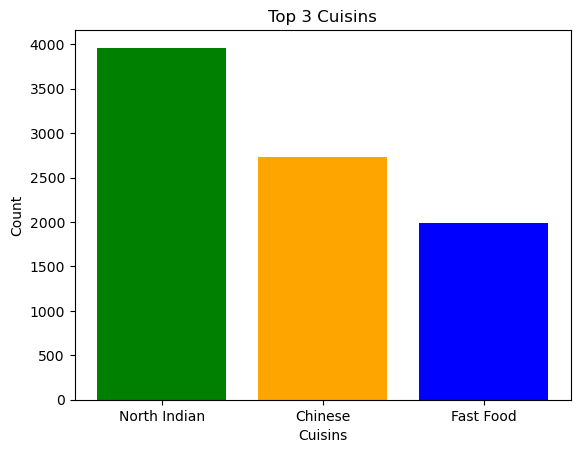

In [37]:
colours = ['green','orange','blue']
plt.bar(top_cuisines.index,top_cuisines.values,color = colours)
plt.xlabel('Cuisins')
plt.ylabel('Count')
plt.title("Top 3 Cuisins")
plt.show()

#  Calculate the percentage of restaurants that serve each of the top cuisines

In [11]:
total_restarunt = len(df)
print(total_restarunt)
top_cusins = cuisines_count.head()
percentage = top_cusins / total_restarunt * 100
print(percentage)


9551
Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Mughlai         10.417757
Italian          7.999162
Name: count, dtype: float64


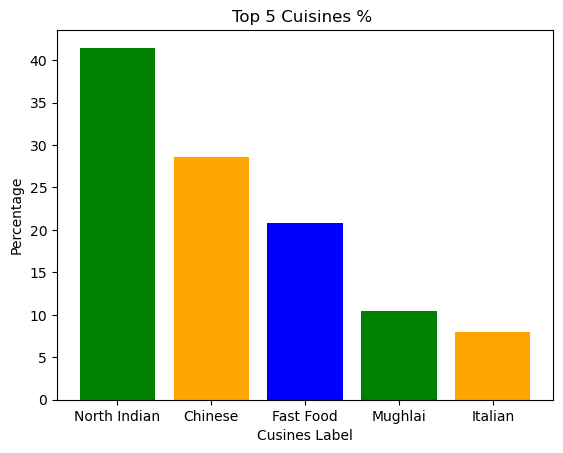

<Figure size 1200x600 with 0 Axes>

In [36]:
plt.bar(top_cusins.index , .values,color=colours)
plt.xlabel("Cusines Label")
plt.ylabel("Percentage")
plt.title("Top 5 Cuisines % ")
plt.figure(figsize=(12,6))
plt.show()


# Task 2 : City Analysis

#  Identify the city with the highest number of restaurants in the dataset

In [13]:
city_restaurant_count = df.groupby('City').size()
max_city = city_restaurant_count.idxmax()
max_count = city_restaurant_count.max()

In [15]:
print("City is : ",max_city)
print("Highest Resturants is : ",max_count)
print(f"The City with the highest number of resturants is {max_city} with {max_count} resturanats.")

City is :  New Delhi
Highest Resturants is :  5473
The City with the highest number of resturants is New Delhi with 5473 resturanats.


# Calculate the average rating for restaurants in each city

In [16]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()
print("The Avarage  Rating of City : ",city_avg_rating )

The Avarage  Rating of City :  City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


# Determine the city with the highest average rating.

In [17]:
highest_avg_city = city_avg_rating.idxmax()
highest_avg_rating = city_avg_rating.max()

In [20]:
print("The Highest Avarage City is : ",highest_avg_city)
print("The Highest Avarage Rating is : ",highest_avg_rating)
print(f"The Highest Avarage City is {highest_avg_city} and Highest Avarage Rating is {highest_avg_rating}")

The Highest Avarage City is :  Inner City
The Highest Avarage Rating is :  4.9
The Highest Avarage City is Inner City and Highest Avarage Rating is 4.9


# Task 3 : Price Range Distribution

# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants

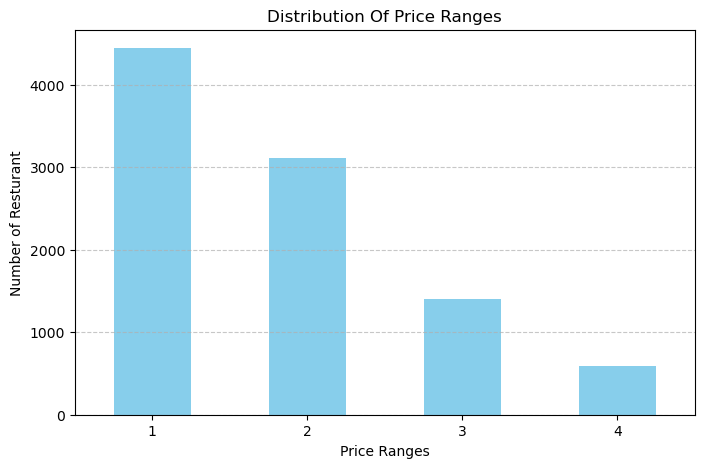

In [22]:
# count the frequency of each price range 
price_counts = df['Price range'].value_counts()
# create a bar chart 
plt.figure(figsize=(8,5))
price_counts.plot(kind='bar',color='skyblue')
plt.title("Distribution Of Price Ranges")
plt.xlabel('Price Ranges')
plt.ylabel('Number of Resturant')
plt.xticks(rotation=0)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

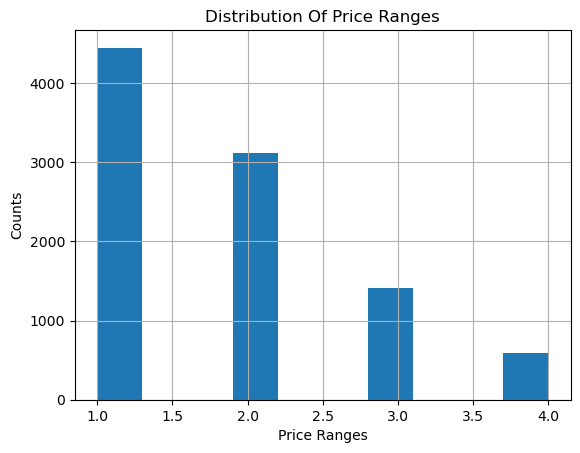

In [29]:
#create histogram chart
df.hist(column='Price range')
plt.title("Distribution Of Price Ranges")
plt.xlabel("Price Ranges")
plt.ylabel("Counts")
plt.show()

#  Calculate the percentage of restaurants in each price range category.


In [33]:
price_count = df['Price range'].value_counts()
total_resturant = len(df)
price_percentage = round((price_count /  total_resturant ) * 100,2)
percentage_m = pd.merge(price_count,price_percentage,on="Price range")
print(percentage_m)

             count_x  count_y
Price range                  
1               4444    46.53
2               3113    32.59
3               1408    14.74
4                586     6.14


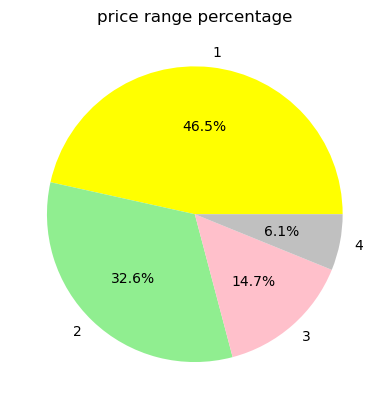

In [56]:
plt.pie(price_percentage,labels=price_percentage.index,autopct='%1.1f%%',colors=["yellow","lightgreen","pink","silver"])
plt.title("price range percentage")
plt.show()

# Task 4 : Online Delivery

# Determine the percentage of restaurants that offer online delivery

In [50]:
online_delivery = df['Has Online delivery'].value_counts().get('Yes',0)
print(online_delivery)
no = df['Has Online delivery'].value_counts().get('No',0)
print(no)
row_counts = len(df)

percentage_of_online_delivery = round((online_delivery / row_counts ) * 100,2 )
print('The percentage of Online Delivery : ',percentage_of_online_delivery)

2451
7100
The percentage of Online Delivery :  25.66


# Compare the average ratings of restaurants with and without online delivery.


In [53]:
Avarage_rating_yes = round(df[df['Has Online delivery']=='Yes']['Aggregate rating'].mean(),2)
print("Avarage Rating With Online Delivery : ",Avarage_rating_yes)
Avarage_rating_no = round(df[df['Has Online delivery']=='No']['Aggregate rating'].mean(),2)
print("Avarage Rating With Online Delivery : ",Avarage_rating_no)


Avarage Rating With Online Delivery :  3.25
Avarage Rating With Online Delivery :  2.47


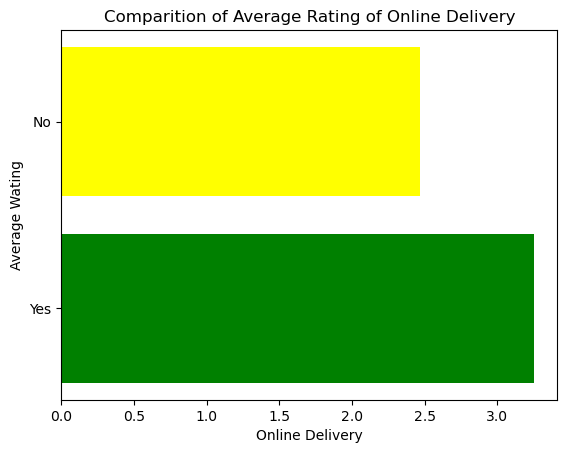

In [54]:
labels = ['Yes','No']
average_rating = [Avarage_rating_yes , Avarage_rating_no]
colors = 'green','yellow'
plt.barh(labels,average_rating,color = colors)
plt.xlabel("Online Delivery")
plt.ylabel("Average Wating")
plt.title("Comparition of Average Rating of Online Delivery")
plt.show()